In [25]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

### Load Dataset

In [26]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url ,                delim_whitespace=True,  # Use whitespace as delimiter
                 header=None,            # No header in the file
                 na_values='?')          # Replace '?' with NaN)
df.describe()

/tmp/ipykernel_10797/1731732170.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url ,                delim_whitespace=True,  # Use whitespace as delimiter


,0,1,2,3,4,5,6,7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
attribute = {
    'mpg': 'continuous',
    'cylinders': 'multi-valued discrete',
    'displacement': 'continuous',
    'horsepower': 'continuous',
    'weight': 'continuous',
    'acceleration': 'continuous',
    'model year': 'multi-valued discrete',
    'origin': 'multi-valued discrete',
    'car name': 'string (unique for each instance)'
}

df.columns = list(attribute.keys())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


### Describing : Mean, Max, Min, Modus

In [29]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [30]:
for col in df.columns:
    print(f"\nModus {col}: ")
    print(df[col].mode())
    print("-----------")


Modus mpg: 
0    13.0
Name: mpg, dtype: float64
-----------

Modus cylinders: 
0    4
Name: cylinders, dtype: int64
-----------

Modus displacement: 
0    97.0
Name: displacement, dtype: float64
-----------

Modus horsepower: 
0    150.0
Name: horsepower, dtype: float64
-----------

Modus weight: 
0    1985.0
1    2130.0
Name: weight, dtype: float64
-----------

Modus acceleration: 
0    14.5
Name: acceleration, dtype: float64
-----------

Modus model year: 
0    73
Name: model year, dtype: int64
-----------

Modus origin: 
0    1
Name: origin, dtype: int64
-----------

Modus car name: 
0    ford pinto
Name: car name, dtype: object
-----------


### Missing Value Diagnose

In [31]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [32]:
for i in df.columns:
    print(f"\n{i}:")
    print(f"sum null = {df[i].isna().sum()}")


mpg:
sum null = 0

cylinders:
sum null = 0

displacement:
sum null = 0

horsepower:
sum null = 6

weight:
sum null = 0

acceleration:
sum null = 0

model year:
sum null = 0

origin:
sum null = 0

car name:
sum null = 0


### Diagnosa Outlier

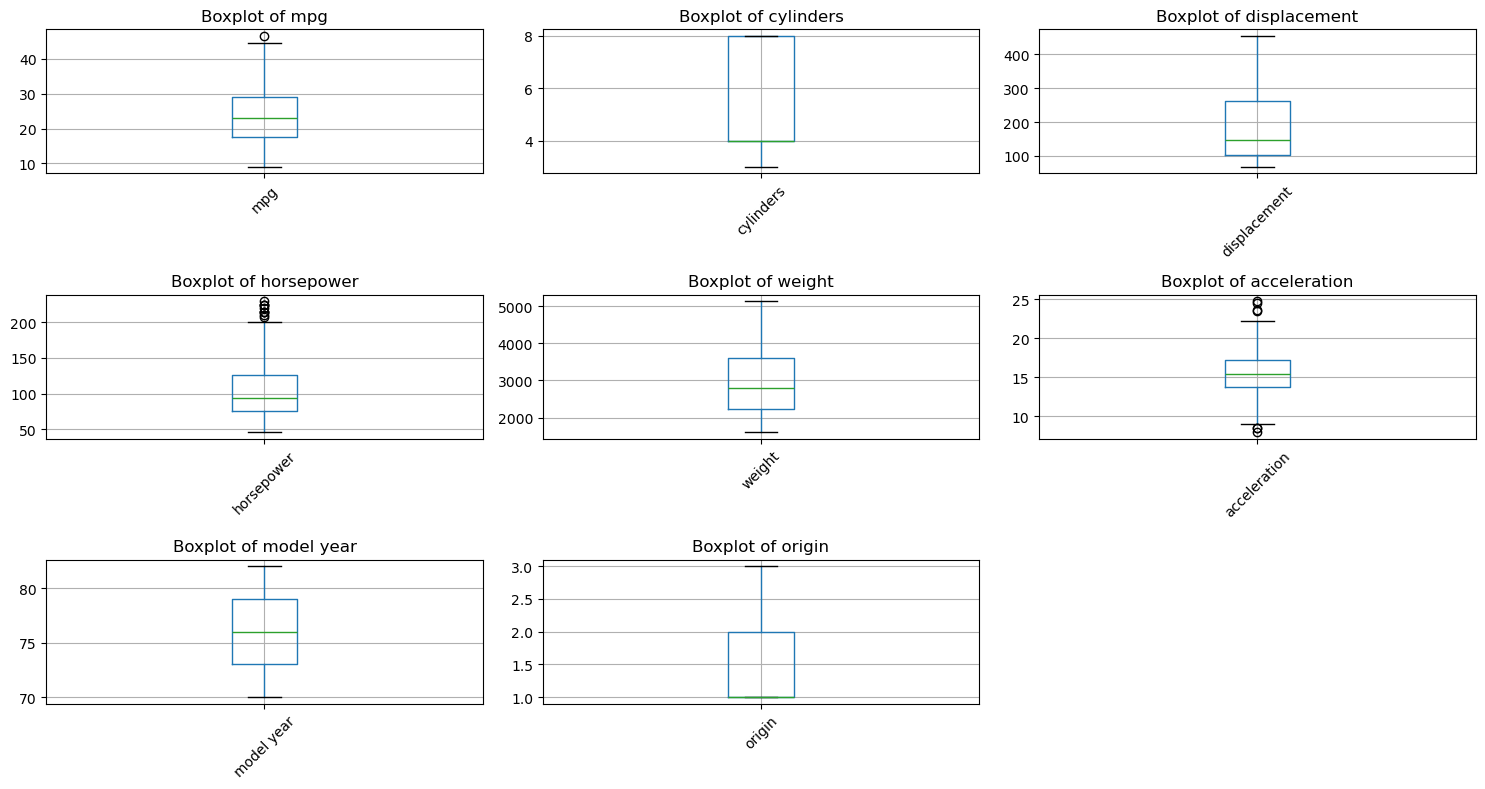

In [33]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.xticks([1], [col], rotation=45)

plt.tight_layout()  
plt.show()

In [34]:
def analyze_boxplot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)][column]
    print(f"{column} outliers: {len(outliers)}")

# Analyze each numerical column
for col in numeric_cols:
    analyze_boxplot(df, col)

mpg outliers: 1
cylinders outliers: 0
displacement outliers: 0
horsepower outliers: 10
weight outliers: 0
acceleration outliers: 7
model year outliers: 0
origin outliers: 0


### Penanganan Missing Value

In [35]:
df['horsepower'].fillna(df.horsepower.mode()[0], inplace=True)
df['horsepower']
df.describe()


/tmp/ipykernel_10797/3351599266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df.horsepower.mode()[0], inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
